Iniciamos baixando dois conjuntos de dados com características bem diferetnes (especialmente considerando sazonalidade e estacionariedade)

In [4]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

--2023-08-28 16:09:56--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6220 (6.1K) [text/plain]
Saving to: ‘daily-total-female-births.csv’

daily-total-female- 100%[===================>]   6.07K  --.-KB/s    in 0s      

2023-08-28 16:09:57 (59.7 MB/s) - ‘daily-total-female-births.csv’ saved [6220/6220]

--2023-08-28 16:09:57--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Vamos começar com o de nascimento de bebês do sexo feminino

<Axes: xlabel='Date'>

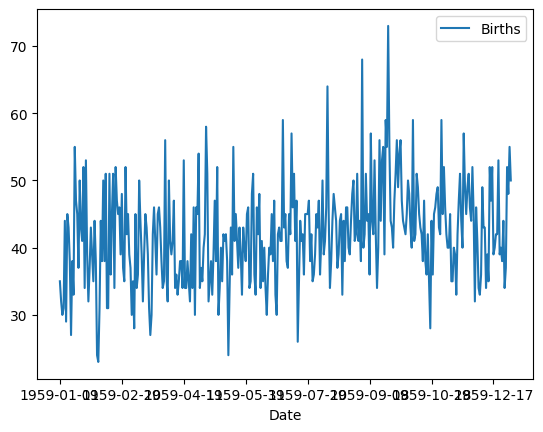

In [7]:
df = pd.read_csv('daily-total-female-births.csv', header=0, index_col=0)
df.plot()

In [8]:
ts_tr = df.values[:256]
ts_te = df.values[256:]

print(ts_tr.shape)
print(ts_te.shape)

(256, 1)
(109, 1)


Usando o statsmodel

In [18]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(ts_tr, lags=255)
model_fit = model.fit()

yhat = model_fit.predict(256,364)

ValueError: ignored

In [19]:
yhat.shape

(109,)

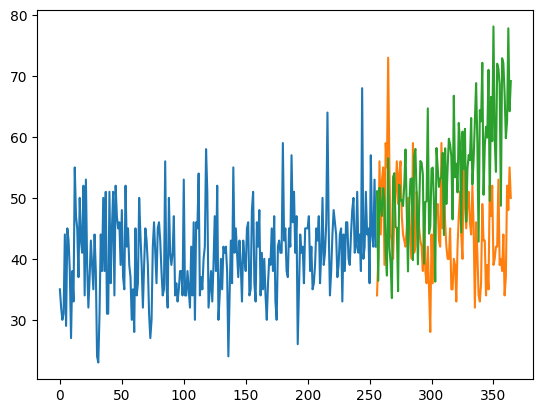

In [20]:
plt.plot(ts_tr)
plt.plot(np.arange(256,365), ts_te)
plt.plot(np.arange(256,365), yhat)

SES

In [25]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(ts_tr)
model_fit = model.fit(smoothing_level = 0.01)

yhat = model_fit.predict(256,364)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


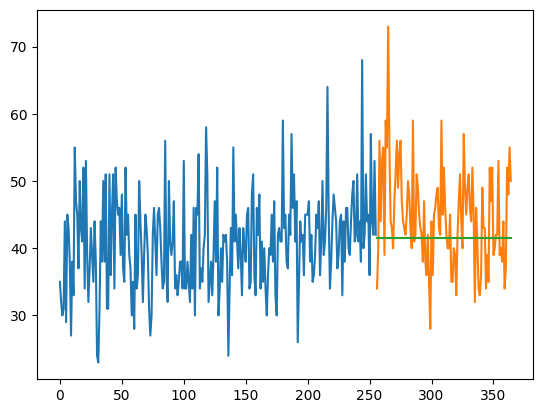

In [26]:
plt.plot(ts_tr)
plt.plot(np.arange(256,365), ts_te)
plt.plot(np.arange(256,365), yhat)

HOLT

In [27]:
from statsmodels.tsa.holtwinters import Holt

model = Holt(ts_tr, exponential=True, damped_trend=True)
model_fit = model.fit()

yhat = model_fit.predict(256,364)

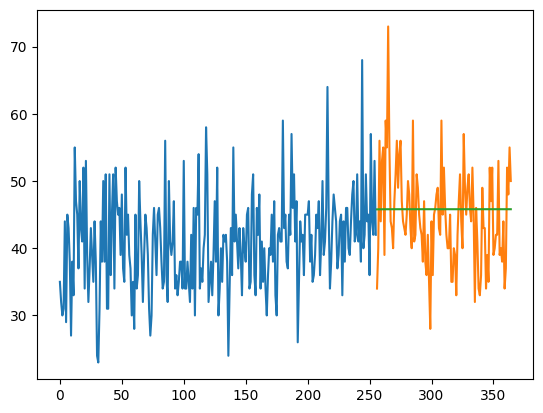

In [28]:
plt.plot(ts_tr)
plt.plot(np.arange(256,365), ts_te)
plt.plot(np.arange(256,365), yhat)

HOLT-WINTERS

In [30]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(ts_tr) #adicionar os parâmetros
# caso contrário, é o AR
model_fit = model.fit()

yhat = model_fit.predict(256,364)

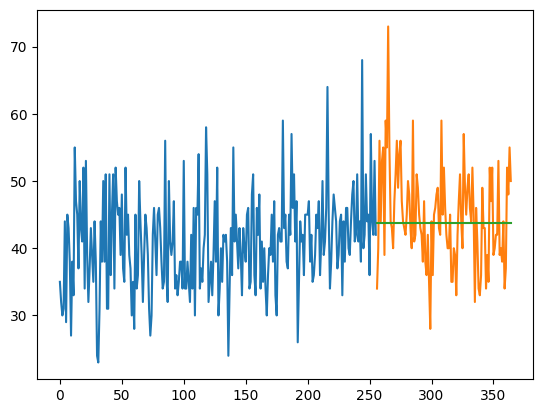

In [31]:
plt.plot(ts_tr)
plt.plot(np.arange(256,365), ts_te)
plt.plot(np.arange(256,365), yhat)

ARIMA! ARIMA! ARIMA!

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(ts_tr, order=(10, 2, 10)) #adicionar os parâmetros

# caso contrário, é o AR
model_fit = model.fit()

yhat = model_fit.predict(256,364)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


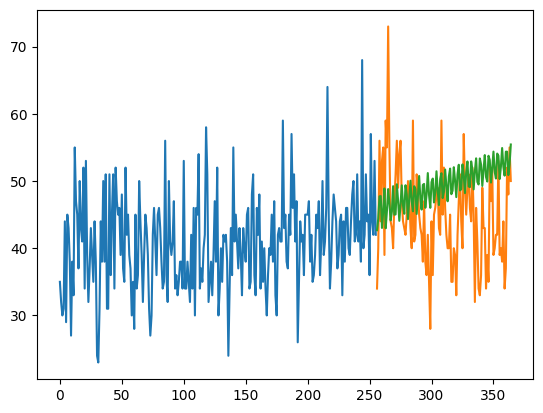

In [44]:
plt.plot(ts_tr)
plt.plot(np.arange(256,365), ts_te)
plt.plot(np.arange(256,365), yhat)